In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import data_utils
import model_utils
import model

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import tensorflow as tf
import numpy as np

In [28]:
data = data_utils.load_training_data()

In [52]:
# To get reasonable outputs, should use something bigger than 150 !
num_epochs = 1000 

In [53]:
model_utils.reset_session_and_model()
with tf.Session() as sess:
    train_config = model.ModelConfig()
    test_config = model.ModelConfig()
    #train_config.num_layers = 1
    #test_config.num_layers = 1
    test_config.batch_size = 1
    test_config.num_steps = 1
    loader = data_utils.DataLoader(data=data,batch_size=train_config.batch_size, num_steps=train_config.num_steps)
    train_model = model.RNNModel(train_config, True)
    test_model = model.RNNModel(test_config, False)
    sess.run(tf.global_variables_initializer())
    saver = tf.train.Saver()
    for idx in range(num_epochs):
        epoch_loss = train_model.train_for_epoch(sess, loader)
        print(idx, ' ', epoch_loss)
        if (idx+1) % 100 == 0:
            saver.save(sess, './models/multirnnmodel.ckpt', global_step=idx)
    sample_preds = test_model.predict(sess, seq_len=4000)


0   0.0953999
1   0.0568929
2   0.054089
3   0.0539805
4   0.0530931
5   0.0526951
6   0.0516644
7   0.0520293
8   0.050945
9   0.0506331
10   0.0502813
11   0.0501865
12   0.0501545
13   0.0495113
14   0.0491513
15   0.0488775
16   0.0483565
17   0.0481421
18   0.0477379
19   0.0475414
20   0.0471932
21   0.0475032
22   0.0469675
23   0.0461971
24   0.0461383
25   0.0458601
26   0.045769
27   0.0456078
28   0.0452534
29   0.0448463
30   0.0446627
31   0.0439267
32   0.0441441
33   0.0435023
34   0.0440688
35   0.0430528
36   0.042424
37   0.0417322
38   0.0414734
39   0.040957
40   0.0414219
41   0.0401643
42   0.0403555
43   0.039505
44   0.0391774
45   0.0391548
46   0.0377446
47   0.0368395
48   0.0357641
49   0.0364186
50   0.0355167
51   0.0341399
52   0.0345759
53   0.0338688
54   0.0338753
55   0.0323489
56   0.0319838
57   0.0318536
58   0.0306606
59   0.0300546
60   0.029759
61   0.0290168
62   0.029704
63   0.0279874
64   0.0276992
65   0.0267826
66   0.0270776
67   0.026190

522   0.00975878
523   0.0103123
524   0.0111713
525   0.0100609
526   0.00959574
527   0.0101519
528   0.0104753
529   0.0111846
530   0.0103271
531   0.0105233
532   0.0103855
533   0.0100405
534   0.0100091
535   0.0101916
536   0.010502
537   0.0108454
538   0.0115058
539   0.0103433
540   0.00998541
541   0.0107627
542   0.0105758
543   0.0108845
544   0.0105302
545   0.00999033
546   0.00985934
547   0.0104061
548   0.00973054
549   0.0102612
550   0.00997953
551   0.010839
552   0.0098353
553   0.00989598
554   0.00980689
555   0.0107255
556   0.0103287
557   0.00992567
558   0.0102525
559   0.00964518
560   0.0097834
561   0.00997873
562   0.00960043
563   0.00996679
564   0.00994235
565   0.00981778
566   0.0100134
567   0.00974336
568   0.0105062
569   0.0105275
570   0.00963585
571   0.00973763
572   0.00952084
573   0.00930751
574   0.0100407
575   0.00955676
576   0.00937445
577   0.00967433
578   0.00954956
579   0.00976453
580   0.0102949
581   0.00999673
582   0.0097490

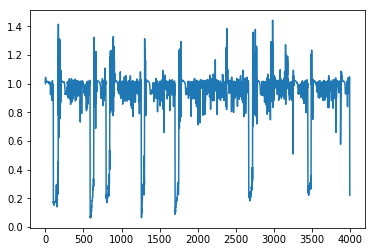

In [54]:
plt.plot(sample_preds)